In [17]:
!pip install gdown

In [19]:
import zipfile
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random
import requests
import tempfile
import gdown

In [13]:
# Step 3: Unzip the downloaded file to a temporary directory
def unzip_to_temp_dir(zip_file_path):
    # Create a temporary directory
    temp_dir = tempfile.mkdtemp()
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)
    print(f"Files unzipped to temporary directory: {temp_dir}")
    return temp_dir

In [14]:
# Step 1: Function to extract images from a zip file and load them
def load_images_from_zip(temp_dir, image_size=(64, 64)):
    images = []
    original_images = []

    # Walk through the extracted files and process images
    for subdir, dirs, files in os.walk(temp_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                # Open the image and convert it to grayscale
                img = Image.open(file_path).convert('L')
                # Resize the image to the specified size (64x64)
                img_resized = img.resize(image_size)
                # Convert the image to a numpy array and flatten it
                img_array = np.array(img_resized).flatten()
                # Add the flattened image and original image to the lists
                images.append(img_array)
                original_images.append(np.array(img))
            except Exception as e:
                print(f"Failed to process image {file_path}: {e}")

    return np.array(images), original_images

In [20]:
# Step 2: Load images from the specified zip file
google_drive_link = 'https://drive.google.com/uc?export=download&id=1HYCX9_n_4YMshyD9otxwqvPBpwu2_Sxl'  # Replace with the path to your zip file
image_size = (224, 224)  # Set image size to 64x64
output_zip_path = 'downloaded_file.zip'

In [21]:
# Step 4: Download the zip file from Google Drive
gdown.download(google_drive_link, output_zip_path, quiet=False)
# Step 5: Unzip the downloaded file to a temporary directory
temp_dir = unzip_to_temp_dir(output_zip_path)

footwear_images, original_images = load_images_from_zip(temp_dir, image_size)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1HYCX9_n_4YMshyD9otxwqvPBpwu2_Sxl
From (redirected): https://drive.google.com/uc?export=download&id=1HYCX9_n_4YMshyD9otxwqvPBpwu2_Sxl&confirm=t&uuid=6cb5d66d-4edc-4f01-8f6f-aa7c973f3cec
To: /content/downloaded_file.zip
100%|██████████| 170M/170M [00:06<00:00, 26.1MB/s]


Files unzipped to temporary directory: /tmp/tmpsa1mn12t
Failed to process image /tmp/tmpsa1mn12t/Footwear/.DS_Store: cannot identify image file '/tmp/tmpsa1mn12t/Footwear/.DS_Store'
Failed to process image /tmp/tmpsa1mn12t/Footwear/Men/.DS_Store: cannot identify image file '/tmp/tmpsa1mn12t/Footwear/Men/.DS_Store'
Failed to process image /tmp/tmpsa1mn12t/Footwear/Women/.DS_Store: cannot identify image file '/tmp/tmpsa1mn12t/Footwear/Women/.DS_Store'
Failed to process image /tmp/tmpsa1mn12t/__MACOSX/Footwear/._.DS_Store: cannot identify image file '/tmp/tmpsa1mn12t/__MACOSX/Footwear/._.DS_Store'
Failed to process image /tmp/tmpsa1mn12t/__MACOSX/Footwear/Men/._.DS_Store: cannot identify image file '/tmp/tmpsa1mn12t/__MACOSX/Footwear/Men/._.DS_Store'
Failed to process image /tmp/tmpsa1mn12t/__MACOSX/Footwear/Women/._.DS_Store: cannot identify image file '/tmp/tmpsa1mn12t/__MACOSX/Footwear/Women/._.DS_Store'


In [ ]:
footwear_images, original_images = load_images_from_zip(temp_dir, image_size)

In [22]:
# Display the number of images loaded
print(f"Total images loaded: {footwear_images.shape[0]}")


Total images loaded: 1580


In [42]:
footwear_images.shape

(1580, 50176)

In [43]:
224*224

50176

In [56]:
# Step 3: Run PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce to 50 principal components
footwear_images_pca = pca.fit_transform(footwear_images)

In [57]:
footwear_images_pca.shape

(1580, 100)

In [58]:
(footwear_images_pca.shape[1]/footwear_images.shape[1])

0.001992984693877551

In [59]:
# Step 4: Create a function to find the nearest images using cosine similarity
def find_nearest_images(image, image_database, n_neighbors=5):
    # Compute the cosine similarity between the image and the image database
    similarities = cosine_similarity([image], image_database)[0]
    # Get the indices of the top n_neighbors most similar images
    nearest_indices = np.argsort(similarities)[-(n_neighbors+1):-1][::-1]
    return nearest_indices

In [60]:
# Step 5: Build the recommendation system
def recommend_images(random_image_index, footwear_images_pca, original_images, n_neighbors=5):
    # Get the PCA projection of the random image
    random_image_pca = footwear_images_pca[random_image_index]

    # Find the nearest 5 images using cosine similarity
    nearest_indices = find_nearest_images(random_image_pca, footwear_images_pca, n_neighbors)

    # Display the random image
    print("Random Image:")
    plt.figure(figsize=(5, 5))
    plt.imshow(original_images[random_image_index], cmap='gray')
    plt.axis('off')
    plt.show()

    # Display the recommended images (nearest neighbors)
    print("Recommended Images:")
    fig, axes = plt.subplots(1, n_neighbors, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(original_images[nearest_indices[i]], cmap='gray')
        ax.axis('off')
    plt.show()

Random Image:


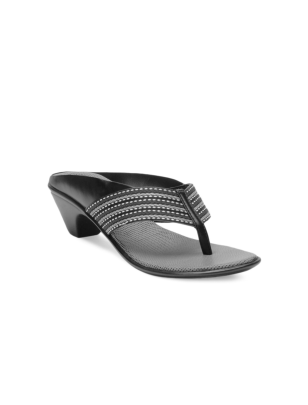

Recommended Images:


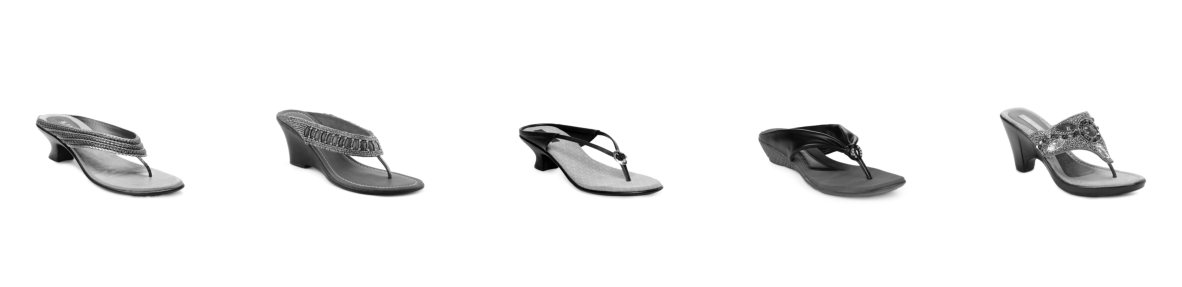

In [61]:
# Step 6: Run the recommendation system on a random image
random_image_index = random.randint(0, footwear_images.shape[0] - 1)
recommend_images(random_image_index, footwear_images_pca, original_images)
